# 第十四章 scikit-learn 库

**scikit-learn 库是当今最流行的机器学习算法库之一**

**可用来解决分类与回归问题**

**本章以鸢尾花数据集为例，简单了解八大传统机器学习分类算法的sk-learn实现**

**欲深入了解传统机器算法的原理和公式推导，请继续学习《统计学习方法》 李航 或《西瓜书》 周志华 《南瓜书》**

## 14.0 鸢尾花数据集

【1】下载数据集

In [2]:
import seaborn as sns

In [3]:
iris = sns.load_dataset("iris",data_home='./',cache=True)

【2】数据集的查看

In [4]:
type(iris)

pandas.core.frame.DataFrame

In [5]:
iris.shape

(150, 5)

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

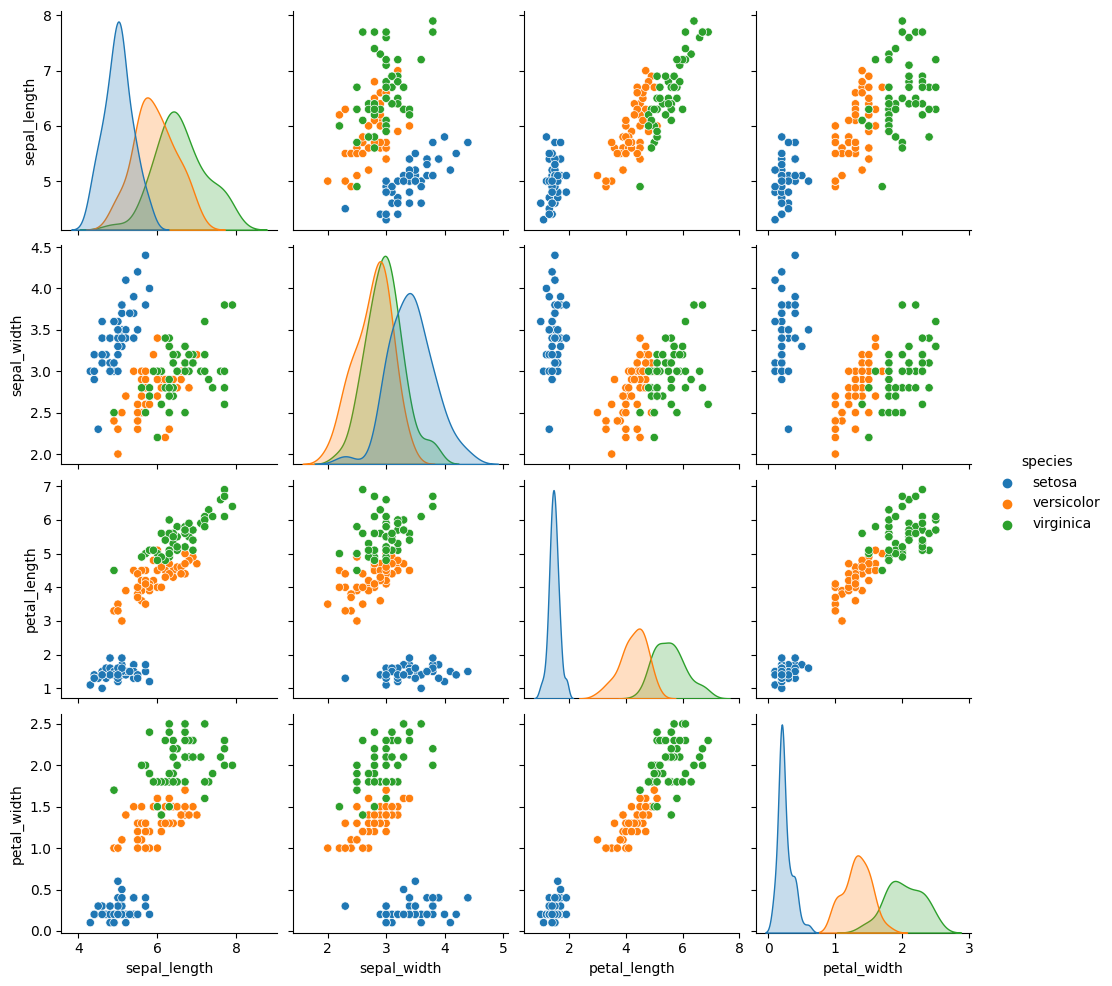

In [5]:
sns.pairplot(data=iris, hue="species")

【3】数据清洗

In [8]:
iris_simple = iris.drop(["sepal_length", "sepal_width"], axis=1)
iris_simple.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


【4】将数据集按标签编码

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
iris_simple["species"] = encoder.fit_transform(iris_simple["species"])

In [10]:
iris_simple

,petal_length,petal_width,species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


【5】数据集的标准化（本数据集特征比较接近，实际处理过程中未标准化）

In [13]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [24]:
trans = StandardScaler()
_iris_simple = trans.fit_transform(iris_simple[["petal_length", "petal_width"]])
_iris_simple = pd.DataFrame(_iris_simple, columns = ["petal_length", "petal_width"])
_iris_simple.describe()

,petal_length,petal_width
count,1.500000e+02,1.500000e+02
mean,-8.652338e-16,-4.662937e-16
std,1.003350e+00,1.003350e+00
min,-1.567576e+00,-1.447076e+00
25%,-1.226552e+00,-1.183812e+00
50%,3.364776e-01,1.325097e-01
75%,7.627583e-01,7.906707e-01
max,1.785832e+00,1.712096e+00


【6】构建训练集和测试集（本课暂不考虑验证集）

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(iris_simple, test_size=0.2)
test_set.head()

,petal_length,petal_width,species
52,4.9,1.5,1
60,3.5,1.0,1
21,1.5,0.4,0
90,4.4,1.2,1
20,1.7,0.2,0


In [17]:
iris_x_train = train_set[["petal_length", "petal_width"]]
iris_x_train.head()

,petal_length,petal_width
49,1.4,0.2
107,6.3,1.8
23,1.7,0.5
145,5.2,2.3
71,4.0,1.3


In [18]:
iris_y_train = train_set["species"].copy()
iris_y_train

49     0
107    2
23     0
145    2
71     1
125    2
14     0
65     1
133    2
99     1
129    2
13     0
68     1
29     0
18     0
64     1
5      0
46     0
61     1
11     0
53     1
69     1
39     0
83     1
97     1
117    2
114    2
19     0
12     0
24     0
      ..
30     0
128    2
35     0
55     1
25     0
143    2
120    2
137    2
17     0
76     1
59     1
2      0
81     1
87     1
134    2
70     1
135    2
91     1
118    2
142    2
139    2
140    2
16     0
51     1
6      0
22     0
136    2
116    2
44     0
72     1
Name: species, Length: 120, dtype: int64

In [19]:
iris_x_test = test_set[["petal_length", "petal_width"]]
iris_x_test.head()

,petal_length,petal_width
52,4.9,1.5
60,3.5,1.0
21,1.5,0.4
90,4.4,1.2
20,1.7,0.2


In [20]:
iris_y_test = test_set["species"].copy()
iris_y_test.head()

52    1
60    1
21    0
90    1
20    0
Name: species, dtype: int64

#### ▲ 在这里说一下训练集和测试集
现在是获取了一堆二维空间里的点，以及所属的species，\
然后现将这些点划分成了两部分，一部分用作训练模型（120），一部分用作测试（30）,\
由上面的图能看出来，不同species集中分布的区域是不同的，就相当于是这三个species'具有不同特征'，\
然后现在的目的就是，用接下来这些算法，将测试集的点归类。\
\
就如一开始所讲的，scikit-learn主要功能，就是实现数据的分类和回归。\
那如果说再具体一点，这个库主要做的是什么事情，将点分类



 






## 14.1 k近邻算法

【1】基本思想

与待预测点最近的训练数据集中的k个邻居  
  
把k个近邻中最常见的类别预测为带预测点的类别

【2】sklearn实现

In [21]:
from sklearn.neighbors import KNeighborsClassifier

* 构建分类器对象

In [22]:
clf = KNeighborsClassifier()
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

* 训练

In [23]:
clf.fit(iris_x_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

* 预测

In [24]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 1 0 1 0 1 0 1 0 2 1 1 2 1 1 1 0 0 2 2 0 1 1 2 1 2 1 2 0 1]
[1 1 0 1 0 1 0 2 0 2 1 1 2 2 1 1 0 0 2 2 0 1 1 2 1 2 1 2 0 1]


* 翻转

In [25]:
encoder.inverse_transform(res)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'setosa',
       'versicolor'], dtype=object)

* 评估

In [26]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:93%


* 存储数据

In [27]:
out = iris_x_test.copy()
out["y"] = iris_y_test
out["pre"] = res
out

,petal_length,petal_width,y,pre
52,4.9,1.5,1,1
60,3.5,1.0,1,1
21,1.5,0.4,0,0
90,4.4,1.2,1,1
20,1.7,0.2,0,0
94,4.2,1.3,1,1
43,1.6,0.6,0,0
138,4.8,1.8,2,1
1,1.4,0.2,0,0
121,4.9,2.0,2,2


In [28]:
out.to_csv("iris_predict.csv")

【3】可视化

In [29]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def draw(clf):

    # 网格化
    M, N = 500, 500
    x1_min, x2_min = iris_simple[["petal_length", "petal_width"]].min(axis=0)
    x1_max, x2_max = iris_simple[["petal_length", "petal_width"]].max(axis=0)
    t1 = np.linspace(x1_min, x1_max, M)
    t2 = np.linspace(x2_min, x2_max, N)
    x1, x2 = np.meshgrid(t1, t2)
    
    # 预测
    x_show = np.stack((x1.flat, x2.flat), axis=1)
    y_predict = clf.predict(x_show)
    
    # 配色
    cm_light = mpl.colors.ListedColormap(["#A0FFA0", "#FFA0A0", "#A0A0FF"])
    cm_dark = mpl.colors.ListedColormap(["g", "r", "b"])
    
    # 绘制预测区域图
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t1, t2, y_predict.reshape(x1.shape), cmap=cm_light)
    
    # 绘制原始数据点
    plt.scatter(iris_simple["petal_length"], iris_simple["petal_width"], label=None,
                c=iris_simple["species"], cmap=cm_dark, marker='o', edgecolors='k')
    plt.xlabel("petal_length")
    plt.ylabel("petal_width")
    
    # 绘制图例
    color = ["g", "r", "b"]
    species = ["setosa", "virginica", "versicolor"]
    for i in range(3):
        plt.scatter([], [], c=color[i], s=40, label=species[i])    # 利用空点绘制图例
    plt.legend(loc="best")
    plt.title('iris_classfier')

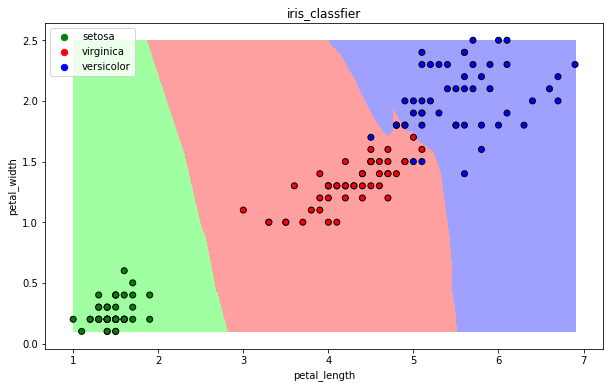

In [30]:
draw(clf)

## 14.2 朴素贝叶斯算法
在垃圾邮件分类场景具有很优秀的性能

【1】基本思想

贝叶斯公式就是条件概率的公式，可以解释为，

在已有数据集(x1,y1),(x2,y2)...,(xn，yn)

求在目前X发生的情况下，y取不同值的概率大小进行排序，取最大概率的y值。

，欸太看懂。。

【2】sklearn实现

In [31]:
from sklearn.naive_bayes import GaussianNB

* 构建分类器对象

In [32]:
clf = GaussianNB()
clf

GaussianNB(priors=None)

* 训练

In [33]:
clf.fit(iris_x_train, iris_y_train)

GaussianNB(priors=None)

* 预测

In [34]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 1 0 1 0 1 0 2 0 2 1 1 2 1 1 1 0 0 2 2 0 1 1 2 1 2 1 2 0 1]
[1 1 0 1 0 1 0 2 0 2 1 1 2 2 1 1 0 0 2 2 0 1 1 2 1 2 1 2 0 1]


* 评估

In [35]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:97%


* 可视化

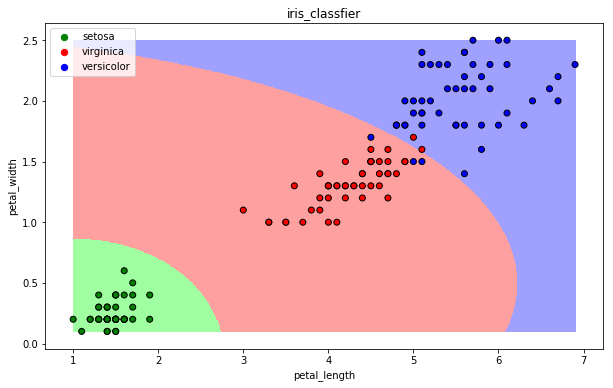

In [36]:
draw(clf)

## 14.3 决策树算法

【1】基本思想

CART算法：每次通过一个特征，将数据尽可能的分为纯净的两类，递归的分下去

利用训练数据，根据损失函数最小化的原则建立决策树模型。预测时，对新的数据，利用决策树模型进行分类。

【2】sklearn实现

In [1]:
from sklearn.tree import DecisionTreeClassifier

* 构建分类器对象

In [51]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

* 训练

In [52]:
clf.fit(iris_x_train, iris_y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

* 预测

In [53]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 2 0 1 2 0 1 2 1 2 2 1 2 1 0 0 1 0 2 1 2 0 1 1 0 1 0 2 0 1]
[1 2 0 1 2 0 1 2 1 2 2 1 2 1 0 0 1 0 2 1 2 0 1 1 0 1 0 2 0 1]


* 评估

In [54]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:100%


* 可视化

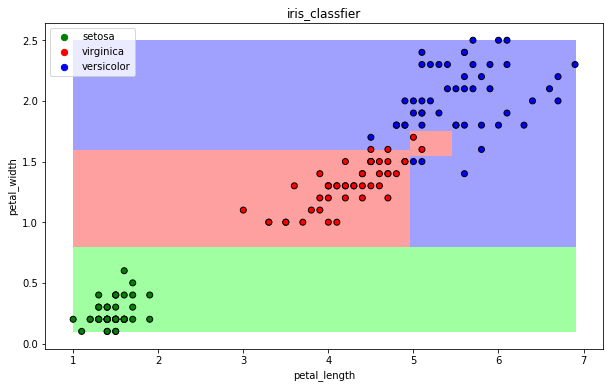

In [55]:
draw(clf)

## 14.4 逻辑回归算法

【1】基本思想

一种解释：
  
训练：通过一个映射方式，将特征X=（x1, x2） 映射成 P(y=ck), 求使得所有概率之积最大化的映射方式里的参数
  
预测：计算p(y=ck) 取概率最大的那个类别作为预测对象的分类

【2】sklearn实现

In [56]:
from sklearn.linear_model import LogisticRegression

* 构建分类器对象

In [57]:
clf = LogisticRegression(solver='saga', max_iter=1000)
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

* 训练

In [58]:
clf.fit(iris_x_train, iris_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

* 预测

In [59]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 2 0 1 2 0 1 2 1 2 2 1 2 1 0 0 2 0 2 1 2 0 1 1 0 1 0 2 0 1]
[1 2 0 1 2 0 1 2 1 2 2 1 2 1 0 0 1 0 2 1 2 0 1 1 0 1 0 2 0 1]


* 评估

In [60]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:97%


* 可视化

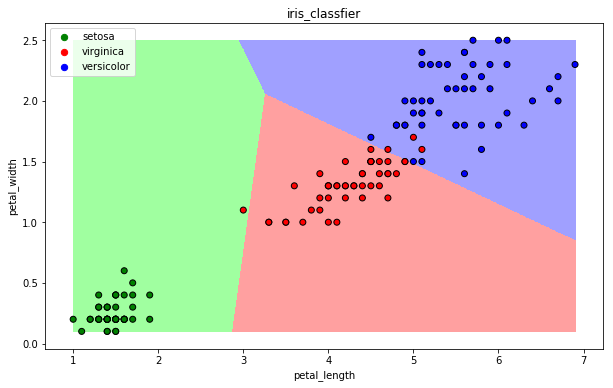

In [61]:
draw(clf)

## 14.5 支持向量机算法

【1】基本思想

以二分类为例，假设数据可用完全分开：
  
用一个超平面将两类数据完全分开，且最近点到平面的距离最大

【2】sklearn实现

In [62]:
from sklearn.svm import SVC

* 构建分类器对象

In [63]:
clf = SVC()
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

* 训练

In [64]:
clf.fit(iris_x_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

* 预测

In [65]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 2 0 1 2 0 1 2 1 2 2 1 2 1 0 0 1 0 2 1 2 0 1 1 0 1 0 2 0 1]
[1 2 0 1 2 0 1 2 1 2 2 1 2 1 0 0 1 0 2 1 2 0 1 1 0 1 0 2 0 1]


* 评估

In [66]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:100%


* 可视化

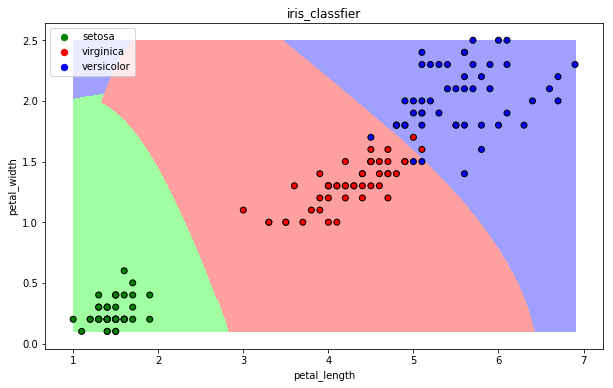

In [67]:
draw(clf)

## 14.7 集成方法——随机森林

【1】基本思想

训练集m，有放回的随机抽取m个数据，构成一组，共抽取n组采样集
  
n组采样集训练得到n个弱分类器   弱分类器一般用决策树或神经网络
  
将n个弱分类器进行组合得到强分类器

【2】sklearn实现

In [68]:
from sklearn.ensemble import RandomForestClassifier

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


* 构建分类器对象

In [69]:
clf = RandomForestClassifier()
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

* 训练

In [70]:
clf.fit(iris_x_train, iris_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

* 预测

In [71]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 2 0 1 2 0 1 2 1 2 2 1 2 1 0 0 1 0 2 1 2 0 1 1 0 1 0 2 0 1]
[1 2 0 1 2 0 1 2 1 2 2 1 2 1 0 0 1 0 2 1 2 0 1 1 0 1 0 2 0 1]


* 评估

In [72]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:100%


* 可视化

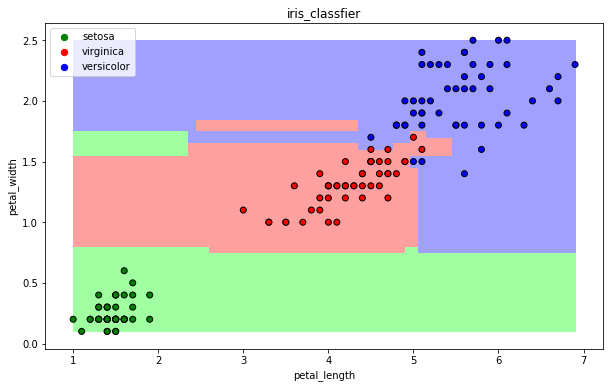

In [73]:
draw(clf)

## 14.7 集成方法——Adaboost

【1】基本思想

训练集m，用初始数据权重训练得到第一个弱分类器，根据误差率计算弱分类器系数，更新数据的权重
  
使用新的权重训练得到第二个弱分类器，以此类推
  
根据各自系数，将所有弱分类器加权求和获得强分类器

【2】sklearn实现

In [74]:
from sklearn.ensemble import AdaBoostClassifier

* 构建分类器对象

In [75]:
clf = AdaBoostClassifier()
clf

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

* 训练

In [77]:
clf.fit(iris_x_train, iris_y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

* 预测

In [78]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 2 0 1 1 0 1 2 1 2 2 1 2 1 0 0 1 0 2 1 2 0 1 1 0 1 0 2 0 1]
[1 2 0 1 2 0 1 2 1 2 2 1 2 1 0 0 1 0 2 1 2 0 1 1 0 1 0 2 0 1]


* 评估

In [79]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:97%


* 可视化

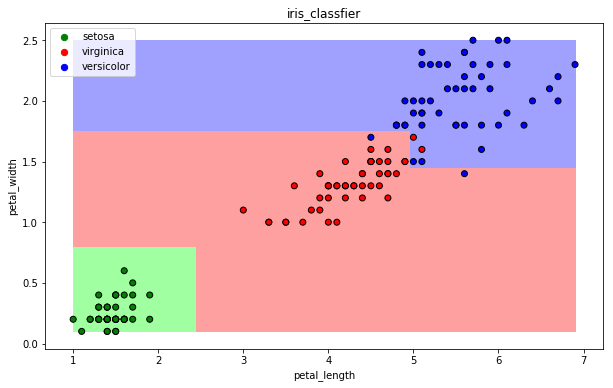

In [80]:
draw(clf)

## 14.8 集成方法——梯度提升树GBDT

【1】基本思想

训练集m，获得第一个弱分类器，获得残差，然后不断地拟合残差

所有弱分类器相加得到强分类器

【2】sklearn实现

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

* 构建分类器对象

In [82]:
clf = GradientBoostingClassifier()
clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

* 训练

In [83]:
clf.fit(iris_x_train, iris_y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

* 预测

In [84]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 2 0 1 2 0 1 2 1 2 2 1 2 1 0 0 1 0 2 1 2 0 1 1 0 1 0 2 0 1]
[1 2 0 1 2 0 1 2 1 2 2 1 2 1 0 0 1 0 2 1 2 0 1 1 0 1 0 2 0 1]


* 评估

In [85]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:100%


* 可视化

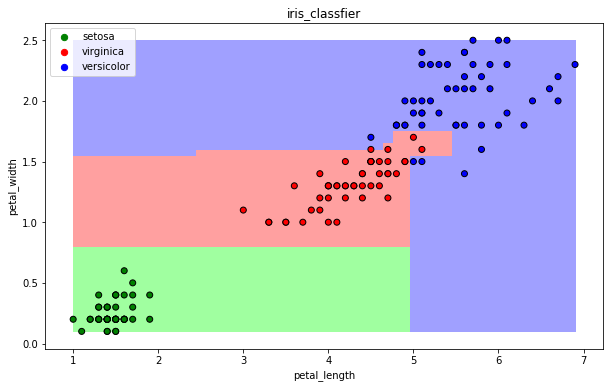

In [86]:
draw(clf)

## 14.9 大杀器

【1】xgboost

GBDT的损失函数只对误差部分做负梯度（一阶泰勒）展开
  
XGBoost损失函数对误差部分做二阶泰勒展开，更加准确，更快收敛

【2】lightgbm

微软：快速的，分布式的，高性能的基于决策树算法的梯度提升框架
  
速度更快

【3】stacking

堆叠或者叫模型融合

先建立几个简单的模型进行训练，第二级学习器会基于前级模型的预测结果进行再训练

【4】神经网络